In [30]:
# Работа с данными 
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler

# Балансировка
from imblearn.over_sampling import SMOTE

# Разделение на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split
# Классификаторы
from catboost import CatBoostClassifier, Pool
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree

# Оценка качества
from yellowbrick.classifier import ROCAUC 
from catboost.utils import get_confusion_matrix
from yellowbrick.contrib.wrapper import wrap

# Визуализация результатов обучения
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

Загрузка массива целей

In [31]:
data = pd.read_csv('feature_data_new_mini.csv')
data

C:\Users\pasha\AppData\Local\Temp\ipykernel_4888\39804954.py:1: DtypeWarning: Columns (113,116,119,122,125) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('feature_data_new_mini.csv')


,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07-28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167249,693,74.0,3.0,2019-03-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,0.0,0.0
167250,693,74.0,3.0,2021-04-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,51.0,51.0
167251,693,74.0,3.0,2021-05-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,55.0,55.0
167252,693,74.0,3.0,2021-07-28,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2206.0,64.0,64.0


In [32]:
goal_cipher = pd.read_csv('goal_cipher.csv')
goal_cipher.head()


,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4


Удалил дубликаты(чистка данных)

In [33]:
print(len(data.index))
data = data.drop_duplicates()
print(len(data.index))

167254
165691


Сравнил дата-сеты

In [34]:
data.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06-28,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07-28,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0


In [35]:
goal_cipher.head()

,Unnamed: 0,ser_loc,zns_loc,prs_loc,year_month,fail_place,fail_reason,fail_type,day
0,0,134,171.0,1.0,2021-01,Дуриан,Момордика,Мармеладный плод,12
1,3,134,166.0,1.0,2021-01,Маракуйя,Либерика,Салакка,12
2,4,240,1068.0,1.0,2021-01,Земляной орех,Абрикос,Пара-гуайява,5
3,7,240,2200.0,1.0,2021-01,Маракуйя,Гранат,Мармеладный плод,17
4,9,240,2734.0,1.0,2021-01,Земляной орех,Бананы,Гнетум гнемон,4


Выделяем целевой массив(берем свой вариант)

In [36]:
goal_cipher = goal_cipher[goal_cipher['fail_reason'] == 'Помпельмус']
goal_cipher['year_month'] = pd.to_datetime(goal_cipher['year_month'])

Подготовил данные к объединению

In [37]:
goal_cipher = goal_cipher[['ser_loc','zns_loc','prs_loc','year_month', 'day']]
goal_cipher.columns = [x.lower() for x in goal_cipher.columns]
goal_cipher['day'] = [int(x) for x in goal_cipher['day']]
data.head()

data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')
goal_cipher['year_month'] = pd.to_datetime(goal_cipher['year_month'], format='%Y-%m')

data['year_month'] = data['year_month'].dt.to_period('M')
goal_cipher['year_month'] = goal_cipher['year_month'].dt.to_period('M')

data.head()

C:\Users\pasha\AppData\Local\Temp\ipykernel_4888\1274740954.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = pd.to_datetime(data['year_month'], format='%Y-%m')
C:\Users\pasha\AppData\Local\Temp\ipykernel_4888\1274740954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year_month'] = data['year_month'].dt.to_period('M')


,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к_y,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0


Объединяем массивы(создается новый)

In [38]:
data_new = data.merge(goal_cipher, on = ['ser_loc','zns_loc','prs_loc','year_month'], how = 'outer')
data_new.head()

,ser_loc,zns_loc,prs_loc,year_month,count_fail,107_repair_count,307_repair_count,308_repair_count,309_repair_count,521_repair_count,...,тл-2к1,эд118а,эд118б,эдп810,эк-810ч,экг-8ж,power,last_of_p_data,last_of_in_invent,day
0,107,3.0,1.0,2020-01,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
1,107,3.0,1.0,2019-03,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3250.0,0.0,0.0,NaN
2,107,4.0,1.0,2020-04,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,0.0,0.0,NaN
3,107,4.0,1.0,2020-06,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,6.0,6.0,NaN
4,107,4.0,1.0,2020-07,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3080.0,10.0,10.0,NaN


In [39]:
data_new.columns

Index(['ser_loc', 'zns_loc', 'prs_loc', 'year_month', 'count_fail',
       '107_repair_count', '307_repair_count', '308_repair_count',
       '309_repair_count', '521_repair_count',
       ...
       'тл-2к1', 'эд118а', 'эд118б', 'эдп810', 'эк-810ч', 'экг-8ж', 'power',
       'last_of_p_data', 'last_of_in_invent', 'day'],
      dtype='object', length=250)

In [40]:
len(data_new)

166213

Находим и чистим плохие столбцы

In [41]:
data_new = data_new.dropna(subset = ['count_fail'])

In [42]:
data_new = data_new.drop(columns=['date_repair_finish_y_1',
       'date_repair_finish_x_2',
       'date_repair_finish_y_2', 'date_repair_finish', 
       'date_repair_finish_x_1'])

Подготовка данных к классификации 

In [43]:
#переход к бинарной целевой метке.
data_new['day'] = [1 if x > 0 else 0 for x in data_new['day']]
data_new = data_new.set_index(['ser_loc','zns_loc','prs_loc','year_month'])

In [44]:
data_new['day'].value_counts()

0    165662
1        72
Name: day, dtype: int64

In [45]:
y = data_new[['day']] 
X = data_new.drop(columns=['day']) #все столбцы, кроме 'day'

Нормализация данных

In [46]:
arr_scaled = MinMaxScaler().fit_transform(data_new) 
data_new = pd.DataFrame(arr_scaled, columns=data_new.columns, index=data_new.index)

Балансировка

In [47]:
sm = SMOTE(random_state=42, k_neighbors=5)
X_res, y_res = sm.fit_resample(X, y)


Разбиение данных

In [48]:
X_train, X_test, y_train, y_test = train_test_split(\
   X_res, y_res, test_size=0.33, random_state=42)


CatBoostClassifier

In [49]:
clf = CatBoostClassifier(
    iterations=5, 
    learning_rate=0.1, 
    loss_function='CrossEntropy'
)

Проверка качества. 


In [50]:
clf.fit(X_train, y_train,         
        eval_set=(X_test, y_test), 
        verbose=False
)

In [51]:
y_pred = clf.predict(X_test)

In [52]:
X_test = X_test.fillna(X_train.mean())

In [53]:
cm = get_confusion_matrix(clf, Pool(np.array(X_train), np.array(y_train)))
cm

array([[108661.,   2266.],
       [  5108., 105952.]])

Создадим матрицу ошибок для предсказанных и настоящих данных.

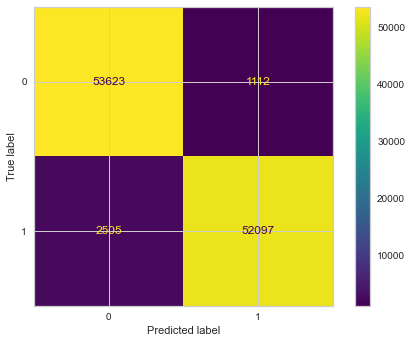

In [58]:
cmm = confusion_matrix(y_test, clf.predict(X_test), labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cmm,
                              display_labels=clf.classes_)

disp.plot()
plt.show()

Напишем собственную функцию

In [59]:
def acc(conf_matrix):
  TP=conf_matrix[0][0]
  FN=conf_matrix[1][0]
  FP=conf_matrix[0][1]
  TN=conf_matrix[1][1]
  accuracy_1=(TP+TN)/(TP+FN+FP+TN)

  precision=TP/(TP+FP)
  recall=TP/(TP+FN)
  f=(2*precision*recall)/(precision+recall)

  b=0.1
  fb=((1+b**2)*precision*recall)/((b**2*precision)+recall)

  print(f'Оценка Accuracy: {accuracy_1}\nОценка F-мера: {f}\nОценка F-мера с весом точности {b}: {fb}')
  
acc(cmm)


Оценка Accuracy: 0.9669187923575734
Оценка F-мера: 0.9673741464690653
Оценка F-мера с весом точности 0.1: 0.9794371339265499


Сравним встроенные функции проверки качества с нашими.

In [60]:
val_score = clf.score(X_test, y_test) 
val_score

0.9669187923575734

In [61]:
accuracy_score(y_test, clf.predict(X_test))

0.9669187923575734